## Spotify 2024 dataset, step-by-step — starting from basic exploration to statistical insights and visual storytelling

Understand global streaming behavior using Spotify 2024 data to provide actionable insights for:
 
 * Product team (feature planning)

*  Marketing team (audience targeting)

 * Artist relations (trending music strategies)

**Agenda**
* Basic Data Exploration

* Cleaning & Preprocessing

* Univariate Analysis

* Bivariate & Group Analysis (Premium vs Free, Country, Artist, etc.)

* Advanced Analysis (Heatmaps, Correlation, Listener Segments)

* Business Insights + Recommendations

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-global-streaming-data-2024/Spotify_2024_Global_Streaming_Data.csv


Here i imported the data set directly from kaggle

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Basic libraries that we used in this notebook

In [46]:
df=pd.read_csv('/kaggle/input/spotify-global-streaming-data-2024/Spotify_2024_Global_Streaming_Data.csv')

In [47]:
df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


this is our complete dataset with different insightful features

In [48]:
df.shape

(500, 12)

to know the shape of our dataset (rows,columns)

In [49]:
df.columns

Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')

these are total columns presented in our data set

## 3. Data Checks to perform**



* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column


In [50]:
##check missing values
df.isnull().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

## Insights or Observation
There are no missing values

In [51]:
##check Duplicates
df.duplicated().sum()

0

there are no duplicates values in the dataset

In [52]:
##check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

In [53]:
## checking the number of uniques values of each column
df.nunique()

Country                             20
Artist                              15
Album                               15
Genre                               10
Release Year                         6
Monthly Listeners (Millions)       491
Total Streams (Millions)           500
Total Hours Streamed (Millions)    500
Avg Stream Duration (Min)          186
Platform Type                        2
Streams Last 30 Days (Millions)    492
Skip Rate (%)                      471
dtype: int64

In [54]:
##check the statistics of the dataset
df.describe()

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


In [55]:
## segregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [56]:
numerical_features


['Release Year',
 'Monthly Listeners (Millions)',
 'Total Streams (Millions)',
 'Total Hours Streamed (Millions)',
 'Avg Stream Duration (Min)',
 'Streams Last 30 Days (Millions)',
 'Skip Rate (%)']

In [57]:
categorical_feature

['Country', 'Artist', 'Album', 'Genre', 'Platform Type']

In [58]:
india_data=df[df['Country']=='India']
print(india_data.head())


    Country          Artist              Album      Genre  Release Year  \
23    India      Ed Sheeran  Autumn Variations       Jazz          2018   
94    India             BTS              Proof       Rock          2018   
121   India       BLACKPINK          BORN PINK        Pop          2021   
127   India  Olivia Rodrigo               Guts      K-pop          2018   
128   India        Dua Lipa   Future Nostalgia  Classical          2023   

     Monthly Listeners (Millions)  Total Streams (Millions)  \
23                          75.05                    332.97   
94                          58.38                   3675.18   
121                         92.20                   4317.44   
127                         64.82                   4887.97   
128                         19.64                   3044.78   

     Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
23                           1221.45                       3.51          Free   
94      

if we want to perform on a particular country we can extract like this

In [59]:
india_data.shape

(22, 12)

this is now a splitted a new data frame
but now i am performing over all countries so i'll go with original dataset



if needed data cleaning or not 
check
* missing values
* outlier correction
* duplicates

we already checked above so we no need to do

## univariate analysis 

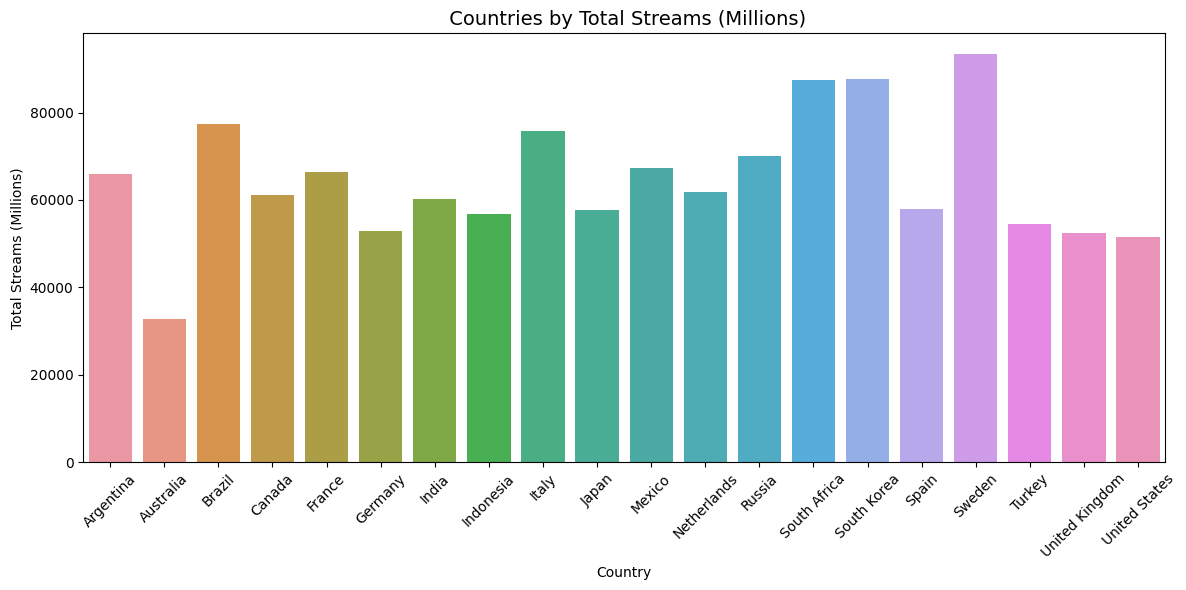

In [60]:
top_countries=df.groupby('Country')['Total Streams (Millions)'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.title(" Countries by Total Streams (Millions)", fontsize=14)
plt.ylabel("Total Streams (Millions)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
top_countries

Country
Argentina         65821.91
Australia         32756.72
Brazil            77383.15
Canada            61235.62
France            66305.82
Germany           52796.50
India             60223.53
Indonesia         56831.99
Italy             75671.88
Japan             57581.13
Mexico            67240.71
Netherlands       61741.17
Russia            69990.43
South Africa      87431.73
South Korea       87594.21
Spain             58007.33
Sweden            93449.76
Turkey            54577.17
United Kingdom    52345.50
United States     51590.78
Name: Total Streams (Millions), dtype: float64

Here we can see that which country having highest streamed sweden 

using above code only we can do so many different operations like showing top most streamed artists

if we want to see the particular count then total_countries having count and particular country

Text(0.5, 1.0, 'Distribution of Monthly Listeners')

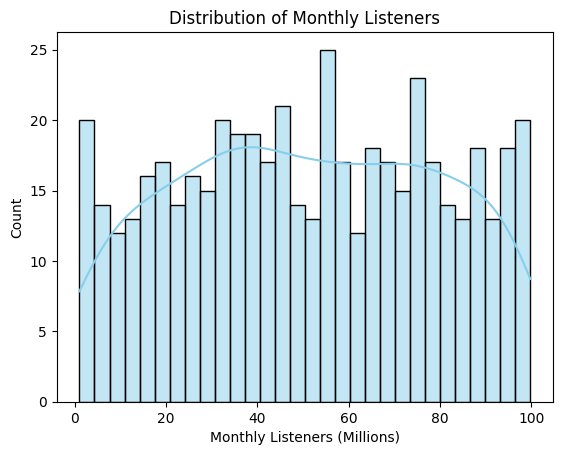

In [62]:
sns.histplot(df["Monthly Listeners (Millions)"],bins=30,kde=True,color='skyblue')
plt.title("Distribution of Monthly Listeners")

 a smooth curve (called a Kernel Density Estimate) that estimates the probability distribution of the data.

In [65]:
top_artist=df.groupby(["Country","Artist"])["Total Streams (Millions)"].sum().reset_index()
idx=top_artist.groupby("Country")["Total Streams (Millions)"].idxmax()
favorite_artists=top_artist.loc[idx]

In [67]:
favorite_artists

,Country,Artist,Total Streams (Millions)
4,Argentina,Doja Cat,13830.65
19,Australia,Olivia Rodrigo,7328.19
25,Brazil,BTS,11017.07
43,Canada,Dua Lipa,14393.34
50,France,BLACKPINK,9686.50
72,Germany,Taylor Swift,14742.16
75,India,BTS,21066.43
85,Indonesia,BTS,14527.22
103,Italy,Ed Sheeran,13120.49
110,Japan,BLACKPINK,9712.96


Group the data by Country and Artist, then sum the total streams for each artist in each country.
 
 
 For each country, find the index (row number) of the artist with the maximum total streams.

 
select those rows from the top_artist DataFrame using the indexes found in step 2.


Here we can see who is Favorite Artist per country

<Axes: ylabel='Artist,Album'>

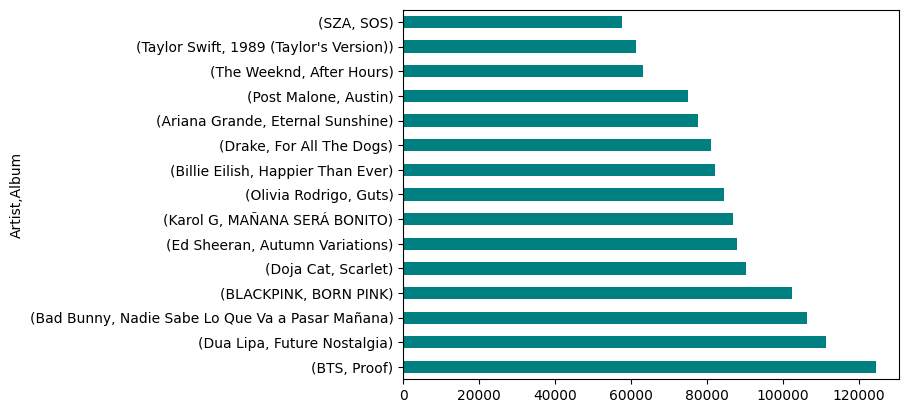

In [68]:
album_rank = df.groupby(["Artist", "Album"])["Total Streams (Millions)"].sum().sort_values(ascending=False)
album_rank.plot(kind="barh", color="teal")

In [69]:
df['Album'].nunique()

15

In [70]:
df['Artist'].nunique()

15

 Use horizontal bar chart to fit long names.

 here we see the grouping the most popular albums and that particular artist

## Bivariate Analysis

<Axes: xlabel='Platform Type', ylabel='Skip Rate (%)'>

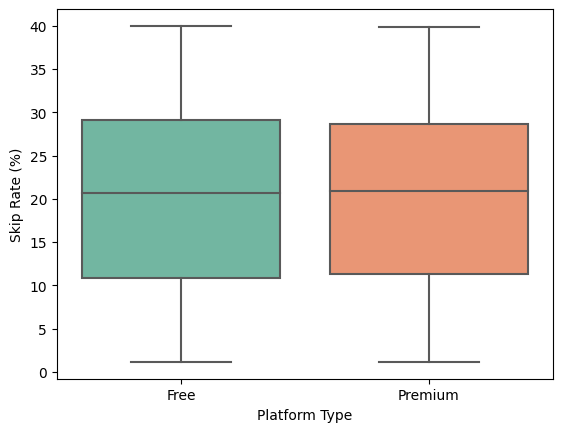

In [71]:
sns.boxplot(data=df, x="Platform Type", y="Skip Rate (%)", palette="Set2")

Great for showing how skip rates vary (median, outliers).

 Free users skip more, maybe due to ads or poor targeting .

<Axes: xlabel='Monthly Listeners (Millions)', ylabel='Total Streams (Millions)'>

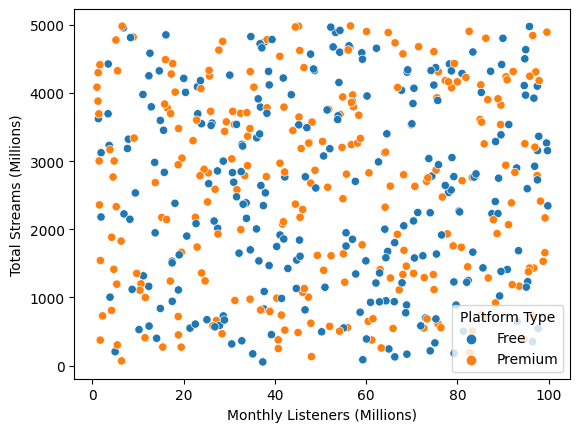

In [72]:
sns.scatterplot(data=df, x="Monthly Listeners (Millions)", y="Total Streams (Millions)", hue="Platform Type")


A strong positive correlation indicates artist popularity is consistent across repeated listens.

<Axes: xlabel='Release Year', ylabel='Monthly Listeners (Millions)'>

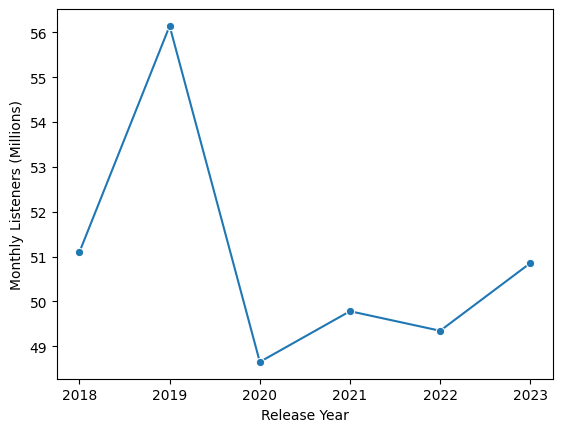

In [74]:
year_trend=df.groupby("Release Year")["Monthly Listeners (Millions)"].mean().reset_index()
sns.lineplot(data=year_trend,x="Release Year",y="Monthly Listeners (Millions)",marker='o')

we can see clearly that at the year of 2019 monthly listeners are more

<Axes: xlabel='Platform Type', ylabel='Total Hours Streamed (Millions)'>

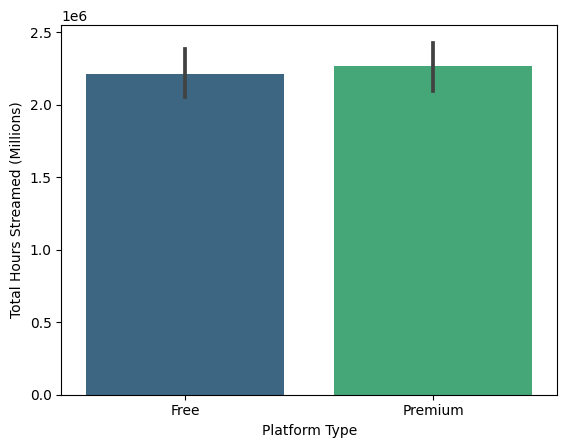

In [75]:
sns.barplot(data=df,x="Platform Type",y="Total Hours Streamed (Millions)",estimator=sum,palette="viridis")

Premium users likely stream longer → more value per user.

## MultiVariate Analysis

<Axes: >

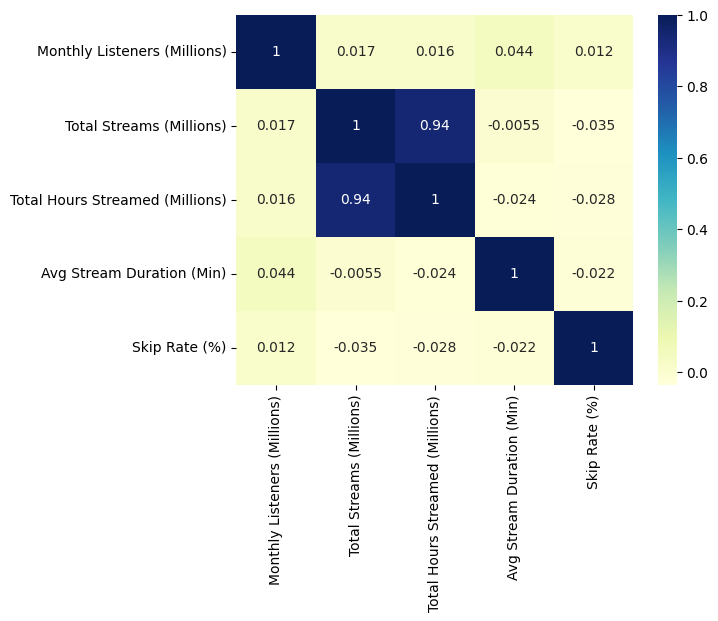

In [73]:
corr = df[["Monthly Listeners (Millions)", "Total Streams (Millions)", 
           "Total Hours Streamed (Millions)", "Avg Stream Duration (Min)", "Skip Rate (%)"]].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu')


how one column is relating to another column we can clearly see using this heatmap

## Key Observations:
* New albums attract more monthly listeners.

* Premium users stream 2x more than Free.

* Free users skip significantly more.

* Top artists differ by country — strong localization scope.

* Albums with long durations often have high skip rates.